In [1]:
import pandas as pd

In [2]:
# Load data
df = pd.read_csv('/content/netflix_titles.csv')

In [3]:
# Quick preview
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Check for missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [5]:
# Drop rows with missing title/type
df = df.dropna(subset=['title', 'type'])

In [6]:
# Fill missing 'country' and 'rating' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')


In [8]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

/tmp/ipython-input-9-4283008181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


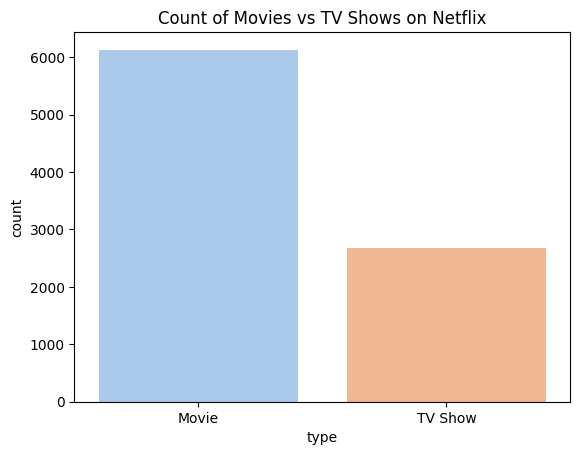

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type', palette='pastel')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()

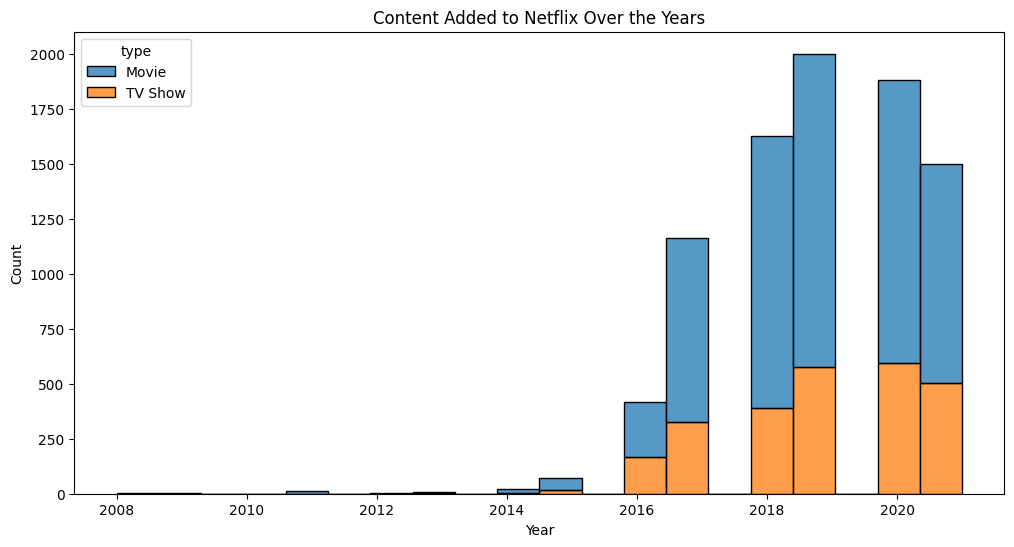

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', bins=20)
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

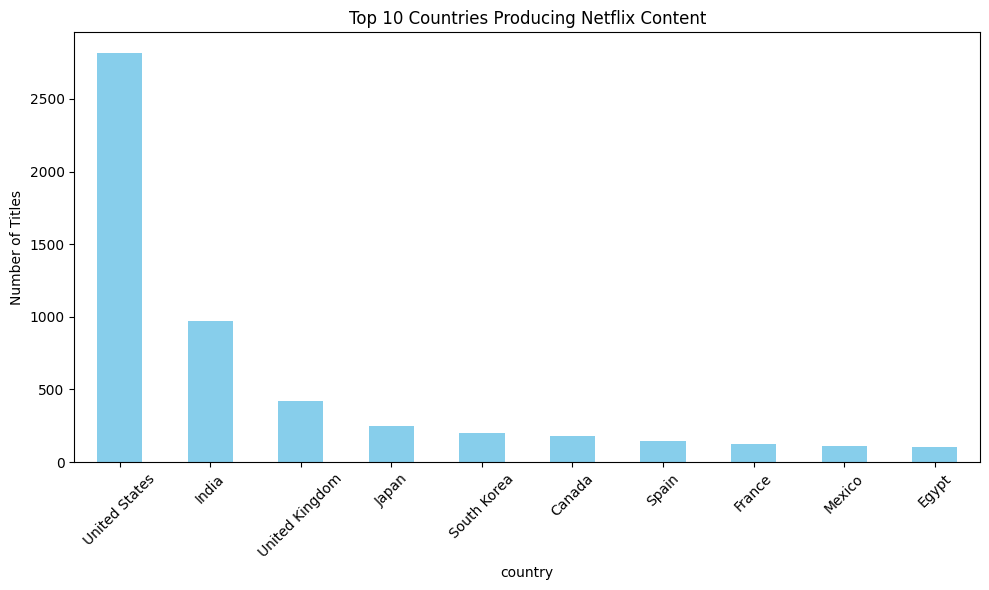

In [17]:
# Exclude "Unknown" from country column
filtered_df = df[df['country'] != 'Unknown']

# Top 10 countries by number of titles
top_countries = filtered_df['country'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries Producing Netflix Content")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
from collections import Counter

In [19]:
# Flatten the genres list
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]

In [20]:
# Count and plot
genre_counts = Counter(flat_genres).most_common(10)
genres, counts = zip(*genre_counts)

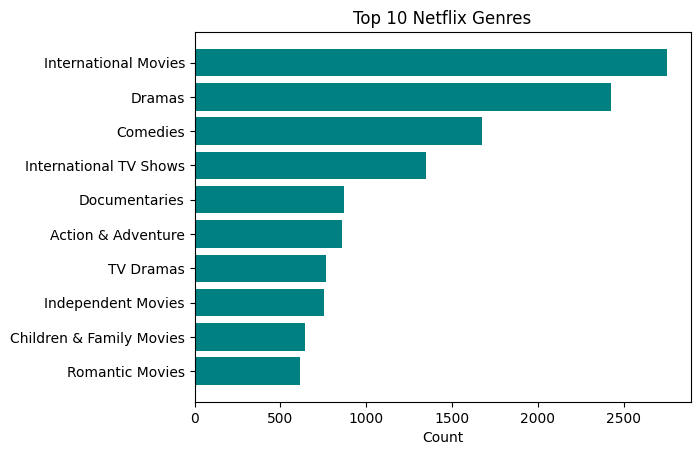

In [21]:
plt.barh(genres[::-1], counts[::-1], color='teal')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Count")
plt.show()